In [17]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns # improves plot aesthetics
import pandas as pd
import pickle
import corner

base_path = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/ForMoSA'     # Give the path to ForMoSA to be able to import it. No need when this will be a pip package
sys.path.insert(1, base_path)
from plot_functions import ComplexRadar


(2638, 4)


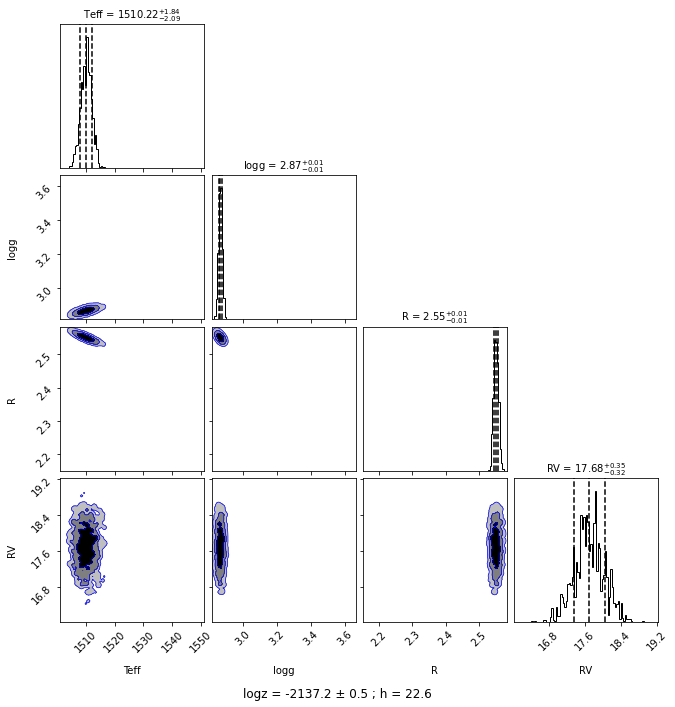

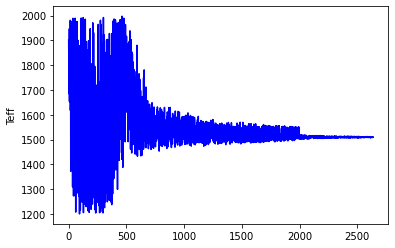

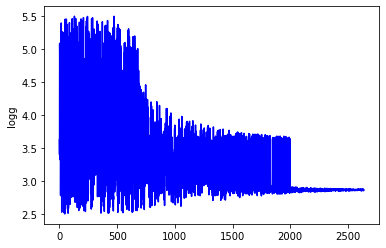

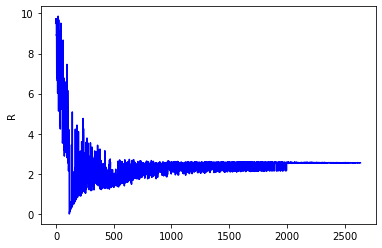

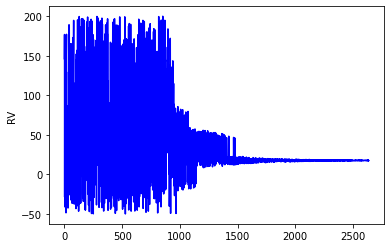

In [20]:

posteriors_outputs = glob.glob('/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/tests/outputs/result_nestle.pic')[0]
names_params = ['Teff', 'logg', 'R', 'RV']
color_outputs = 'blue'

with open(posteriors_outputs, 'rb') as f1:
        result         = pickle.load(f1)
        samples        = result.samples
        weights        = result.weights
        print(np.shape(samples))
    
        sample_logz    = round(result['logz'],1)
        sample_logzerr = round(result['logzerr'],1)
        sample_h       = round(result['h'],1)
        outputs_string = 'logz = '+ str(sample_logz)+' ± '+str(sample_logzerr)+ ' ; h = '+str(sample_h)
        
fig = corner.corner(samples,
                        weights=weights,
                        labels=names_params,
                        range=[0.999999 for p in names_params],
                        levels=[0.997, 0.95, 0.68],
                        bins=100,
                        smooth=1,
                        quantiles=(0.16, 0.5, 0.84),
                        #quiet=False,
                        top_ticks=False,
                        plot_datapoints=False,
                        plot_density=True,
                        plot_contours=True,
                        # no_fill_contours=True,
                        fill_contours=True,
                        show_titles=True,
                        title_fmt='.2f',
                        title_kwargs=dict(fontsize=10),
                        contour_kwargs=dict(colors=color_outputs, linewidths=0.7),
                        pcolor_kwargs=dict(color='red'),
                        label_kwargs=dict(fontsize=10))

fig.supxlabel(outputs_string, va='top')
plt.show()

for i in range(len(samples[0][:])):
        plt.plot(samples[:,i], color=color_outputs)
        plt.ylabel(names_params[i])
        plt.show()

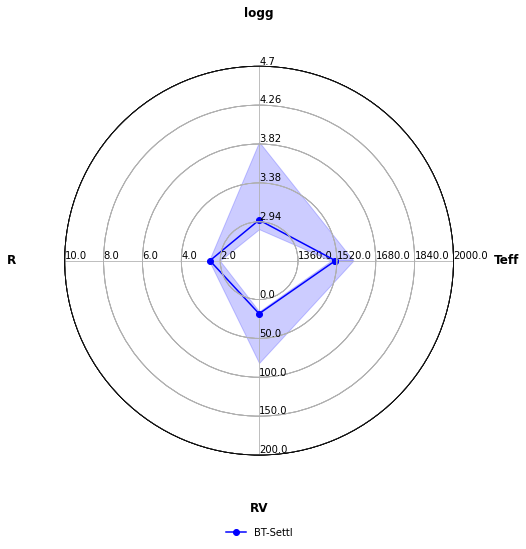

In [22]:
quantiles=[0.16, 0.5, 0.84]
cifrassignificativas=[0,2,2,2]
ranges = [(1200,2000),(2.5,4.7),(0,10),(-50,200)]
angles = np.linspace(0,360,len(names_params))


fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, names_params, ranges)

list_posteriors=[]
list_uncert_down=[]
list_uncert_up=[]
for l in range(len(samples[1,:])):
    q16, q50, q84 = corner.quantile(samples[:,l], quantiles)
    latex_value_1 = round(q50, cifrassignificativas[l])
    
    list_posteriors.append(latex_value_1)
    list_uncert_down.append(q16)
    list_uncert_up.append(q84)

radar.plot(list_posteriors, 'o-', color=color_outputs, label='BT-Settl')
radar.fill_between(list_uncert_down,list_uncert_up, color=color_outputs, alpha=0.2)

radar.ax.legend(loc='center', bbox_to_anchor=(0.5, -0.20),frameon=False, ncol=2)
plt.show()

KeyError: 'flx is not a file in the archive'

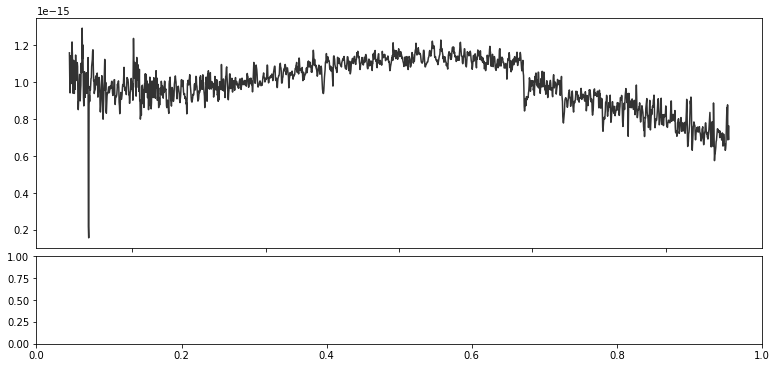

In [30]:
fig = plt.figure(figsize=(13, 6))
fig.tight_layout()
size = (7,1)
ax1 = plt.subplot2grid(size, (0, 0),rowspan=5 ,colspan=5)
axr1= plt.subplot2grid(size, (5, 0),rowspan=2 ,colspan=5)

fit     = sorted(glob.glob('/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/tests/outputs/spectrum_obs.npz'))
bf_fit = np.load(fit[0])

ax1.plot(bf_fit['obs_merge'][0],bf_fit['obs_merge'][1],'-',color='black', label='Data', alpha=0.8)

ax1.plot(bf_fit['obs_merge'][0],bf_fit['flx'],'-', color=color_outputs, label='BT-Settl', alpha=0.8)
        
axr1.plot(bf_fit['obs_merge'][0],(bf_fit['obs_merge'][1]-bf_fit['flx']),'-',label='Data - BT-Settl',color=color_outputs,alpha=0.8)

In [29]:

for k in bf_fit.files:
    print(k)
    print(bf_fit[k])


obs_merge
[[1.95304004e+00 1.95328504e+00 1.95353004e+00 ... 2.44671505e+00
  2.44696005e+00 2.44720505e+00]
 [1.15922346e-15 1.01987308e-15 9.42198880e-16 ... 7.11061247e-16
  7.64628944e-16 6.91834755e-16]
 [9.69466216e-17 1.14293769e-16 1.09448441e-16 ... 1.89960214e-16
  2.24022262e-16 2.58090599e-16]
 [5.09000000e+03 5.09000000e+03 5.09000000e+03 ... 5.09000000e+03
  5.09000000e+03 5.09000000e+03]]
obs_cut
[[[1.95304004e+00 1.95328504e+00 1.95353004e+00 ... 2.44671505e+00
   2.44696005e+00 2.44720505e+00]
  [1.15922346e-15 1.01987308e-15 9.42198880e-16 ... 7.11061247e-16
   7.64628944e-16 6.91834755e-16]
  [9.69466216e-17 1.14293769e-16 1.09448441e-16 ... 1.89960214e-16
   2.24022262e-16 2.58090599e-16]
  [5.09000000e+03 5.09000000e+03 5.09000000e+03 ... 5.09000000e+03
   5.09000000e+03 5.09000000e+03]]]
obs_cut_ins
[[['SINFONI-K' 'SINFONI-K' 'SINFONI-K' ... 'SINFONI-K' 'SINFONI-K'
   'SINFONI-K']]]
obs_merge_ins
[['SINFONI-K' 'SINFONI-K' 'SINFONI-K' ... 'SINFONI-K' 'SINFONI-K'
  